In [7]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# Display
from IPython.display import display

In [8]:
# pandas options
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

In [9]:
# Load the nycflight13 dataset
# flights_data = sm.datasets.get_rdataset("flights", "nycflights13")
# flights = flights_data.data
flights = pd.read_csv("data/flights.csv")
# flights = flights.drop(columns="time_hour") # drop the "time_hour" column
# print(flights_data.__doc__)

In [10]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40


Had an arrival delay of two or more hours

In [11]:
flights.query('arr_delay > 120')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
119,2013,1,1,811.00,630,101.00,1047.00,830,137.00,MQ,4576,N531MQ,LGA,CLT,118.00,544,6,30
151,2013,1,1,848.00,1835,853.00,1001.00,1950,851.00,MQ,3944,N942MQ,JFK,BWI,41.00,184,18,35
218,2013,1,1,957.00,733,144.00,1056.00,853,123.00,UA,856,N534UA,EWR,BOS,37.00,200,7,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336724,2013,9,30,2053.00,1815,158.00,2310.00,2054,136.00,EV,5292,N600QX,EWR,ATL,91.00,746,18,15
336757,2013,9,30,2159.00,1845,194.00,2344.00,2030,194.00,9E,3320,N906XJ,JFK,BUF,50.00,301,18,45
336763,2013,9,30,2235.00,2001,154.00,59.00,2249,130.00,B6,1083,N804JB,JFK,MCO,123.00,944,20,1


- Flew to Houston (IAH or HOU)

In [12]:
flights.query('dest == "IAH" | dest == "HOU"')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29
32,2013,1,1,623.00,627,-4.00,933.00,932,1.00,UA,496,N459UA,LGA,IAH,229.00,1416,6,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336618,2013,9,30,1859.00,1859,0.00,2134.00,2159,-25.00,UA,1128,N14731,LGA,IAH,180.00,1416,18,59
336694,2013,9,30,2015.00,2015,0.00,2244.00,2307,-23.00,UA,1545,N17730,EWR,IAH,174.00,1400,20,15
336737,2013,9,30,2105.00,2106,-1.00,2329.00,2354,-25.00,UA,475,N477UA,EWR,IAH,175.00,1400,21,6


- Departed in summer (July, August, and September)

In [13]:
flights.query('month in [7, 8, 9]')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
250450,2013,7,1,1.00,2029,212.00,236.00,2359,157.00,B6,915,N653JB,JFK,SFO,315.00,2586,20,29
250451,2013,7,1,2.00,2359,3.00,344.00,344,0.00,B6,1503,N805JB,JFK,SJU,200.00,1598,23,59
250452,2013,7,1,29.00,2245,104.00,151.00,1,110.00,B6,234,N348JB,JFK,BTV,66.00,266,22,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40


- Arrived more than two hours late, but didn’t leave late

In [14]:
flights.query('arr_delay > 120 & dep_delay <= 0')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
22911,2013,1,27,1419.00,1420,-1.00,1754.00,1550,124.00,MQ,3728,N1EAMQ,EWR,ORD,135.00,719,14,20
33011,2013,10,7,1350.00,1350,0.00,1736.00,1526,130.00,EV,5181,N611QX,LGA,MSN,117.00,812,13,50
33019,2013,10,7,1357.00,1359,-2.00,1858.00,1654,124.00,AA,1151,N3CMAA,LGA,DFW,192.00,1389,13,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291439,2013,8,13,657.00,659,-2.00,1015.00,814,121.00,EV,4522,N14188,EWR,BNA,146.00,748,6,59
305985,2013,8,28,1157.00,1200,-3.00,1520.00,1316,124.00,US,2179,N737US,LGA,DCA,63.00,214,12,0
325764,2013,9,19,656.00,700,-4.00,1037.00,833,124.00,UA,331,N808UA,LGA,ORD,192.00,733,7,0


- Were delayed by at least an hour, but made up over 30 minutes in flight

In [15]:
flights.query('dep_delay > 60 & arr_delay - dep_delay < -30')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
815,2013,1,1,2205.00,1720,285.00,46.00,2040,246.00,AA,1999,N5DNAA,EWR,MIA,146.00,1085,17,20
832,2013,1,1,2326.00,2130,116.00,131.00,18,73.00,B6,199,N594JB,JFK,LAS,290.00,2248,21,30
2286,2013,1,3,1503.00,1221,162.00,1803.00,1555,128.00,UA,551,N835UA,EWR,SFO,320.00,2565,12,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336674,2013,9,30,1956.00,1825,91.00,2208.00,2121,47.00,DL,1576,N3772H,JFK,SAN,292.00,2446,18,25
336704,2013,9,30,2028.00,1910,78.00,2255.00,2215,40.00,AA,21,N338AA,JFK,LAX,294.00,2475,19,10
336762,2013,9,30,2233.00,2113,80.00,112.00,30,42.00,UA,471,N578UA,EWR,SFO,318.00,2565,21,13


- Departed between midnight and 6am (inclusive)

In [16]:
flights.query('dep_time >= 0 & dep_time <= 600')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335804,2013,9,30,558.00,600,-2.00,742.00,749,-7.00,DL,731,N337NB,LGA,DTW,83.00,502,6,0
335805,2013,9,30,559.00,600,-1.00,NaN,715,NaN,WN,464,N411WN,EWR,MDW,NaN,711,6,0
335806,2013,9,30,600.00,600,0.00,844.00,856,-12.00,B6,601,N588JB,JFK,FLL,139.00,1069,6,0


- Find the fastest flights

In [17]:
(
    flights.assign(speed=flights.distance / flights.air_time)
    .sort_values(by="speed", ascending=False)
)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,speed
216447,2013,5,25,1709.00,1700,9.00,1923.00,1937,-14.00,DL,1499,N666DN,LGA,ATL,65.00,762,17,0,11.72
251999,2013,7,2,1558.00,1513,45.00,1745.00,1719,26.00,EV,4667,N17196,EWR,MSP,93.00,1008,15,13,10.84
205388,2013,5,13,2040.00,2025,15.00,2225.00,2226,-1.00,EV,4292,N14568,EWR,GSP,55.00,594,20,25,10.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,NaN
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,NaN
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,NaN


- Sort flights to find the most delayed flights. Find the flights that left earliest

In [18]:
dep_delay_descending = flights.sort_values('dep_delay', ascending=False)
dep_delay_ascending = flights.sort_values('dep_delay', ascending=True)
print('출발 지연이 가장 많이 된 항공편\n')
display(dep_delay_descending)
print('출발 시간이 가장 빠른 항공편\n')
display(dep_delay_ascending)

출발 지연이 가장 많이 된 항공편



,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
7072,2013,1,9,641.00,900,1301.00,1242.00,1530,1272.00,HA,51,N384HA,JFK,HNL,640.00,4983,9,0
235778,2013,6,15,1432.00,1935,1137.00,1607.00,2120,1127.00,MQ,3535,N504MQ,JFK,CMH,74.00,483,19,35
8239,2013,1,10,1121.00,1635,1126.00,1239.00,1810,1109.00,MQ,3695,N517MQ,EWR,ORD,111.00,719,16,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40


출발 시간이 가장 빠른 항공편



,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
89673,2013,12,7,2040.00,2123,-43.00,40.00,2352,48.00,B6,97,N592JB,JFK,DEN,265.00,1626,21,23
113633,2013,2,3,2022.00,2055,-33.00,2240.00,2338,-58.00,DL,1715,N612DL,LGA,MSY,162.00,1183,20,55
64501,2013,11,10,1408.00,1440,-32.00,1549.00,1559,-10.00,EV,5713,N825AS,LGA,IAD,52.00,229,14,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40


- Which flights travelled the farthest? Which travelled the shortest?

In [19]:
farthest_flights = flights.sort_values('distance', ascending=False)
shortest_flights = flights.sort_values('distance', ascending=True)
print('가장 멀리 비행한 항공편\n')
display(farthest_flights)
print('가장 짧게 비행한 항공편')
display(shortest_flights)

가장 멀리 비행한 항공편



,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
50676,2013,10,26,1004.00,1000,4.00,1435.00,1450,-15.00,HA,51,N386HA,JFK,HNL,608.00,4983,10,0
108078,2013,12,28,933.00,930,3.00,1520.00,1535,-15.00,HA,51,N384HA,JFK,HNL,633.00,4983,9,30
100067,2013,12,19,924.00,930,-6.00,1450.00,1535,-45.00,HA,51,N386HA,JFK,HNL,609.00,4983,9,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164109,2013,3,30,1942.00,1950,-8.00,2026.00,2044,-18.00,EV,4457,N12569,EWR,PHL,24.00,80,19,50
22334,2013,1,26,1621.00,1617,4.00,1705.00,1722,-17.00,EV,4616,N14153,EWR,PHL,27.00,80,16,17
275945,2013,7,27,NaN,106,NaN,NaN,245,NaN,US,1632,NaN,EWR,LGA,NaN,17,1,6


가장 짧게 비행한 항공편


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
275945,2013,7,27,NaN,106,NaN,NaN,245,NaN,US,1632,NaN,EWR,LGA,NaN,17,1,6
3083,2013,1,4,1240.00,1200,40.00,1333.00,1306,27.00,EV,4193,N14972,EWR,PHL,30.00,80,12,0
16328,2013,1,19,1617.00,1617,0.00,1722.00,1722,0.00,EV,4616,N12540,EWR,PHL,34.00,80,16,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151311,2013,3,17,1006.00,1000,6.00,1607.00,1530,37.00,HA,51,N380HA,JFK,HNL,686.00,4983,10,0
218562,2013,5,28,953.00,1000,-7.00,1447.00,1500,-13.00,HA,51,N385HA,JFK,HNL,631.00,4983,10,0
289650,2013,8,11,950.00,1000,-10.00,1438.00,1440,-2.00,HA,51,N391HA,JFK,HNL,628.00,4983,10,0


- 각 도착지 별로, 뉴욕에서 출항한 항공편이 1년 중 몇일 있었는가?

In [20]:
day_flights_dest_dep = (
    flights
    .groupby(['month', 'day', 'dest'])
    .size()
    .reset_index(name='n')
    .groupby('dest').size())

display(day_flights_dest_dep)

dest
ABQ    254
ACK    155
ALB    260
      ... 
TVC     37
TYS    322
XNA    314
Length: 105, dtype: int64

- 뉴욕에서 1년 중 300일 이상 출항하는 도착지들을 구하면?

In [21]:
day_flights_dest_dep_more_300 = (
    day_flights_dest_dep
    .reset_index(name='count')
    .query('count >= 300'))

display(day_flights_dest_dep_more_300)

,dest,count
4,ATL,365
5,AUS,365
10,BNA,365
...,...,...
101,TUL,314
103,TYS,322
104,XNA,314


- Our destinition of cancelled flights (dep_delay or arr_delay is missing) is slightly suboptimal. Why? Which is the most important column?
    - 예를 들어, 출발지연은 missing이 아니나 도착지연은 missing인 것이 있음

In [22]:
flights.query('dep_delay.isna() & ~arr_delay.isna()')[["dep_time", "arr_time", "dep_delay", "arr_delay"]]
# 출발 지연 missing이면 도착 지연은 missing이어야 한다

,dep_time,arr_time,dep_delay,arr_delay


In [23]:
flights.query('~dep_delay.isna() & arr_delay.isna()')[["dep_time", "arr_time", "dep_delay", "arr_delay"]]
# 출발 지연은 missing이 아니나 도착 지연은 missing인 것이 있음 -> 도착지연이 missing인 경우 결항이 아니고, 출발 지연이 missing이면 결항된 항공편임

,dep_time,arr_time,dep_delay,arr_delay
471,1525.00,1934.00,-5.00,NaN
477,1528.00,2002.00,29.00,NaN
615,1740.00,2158.00,-5.00,NaN
...,...,...,...,...
334495,1214.00,1801.00,-11.00,NaN
335534,1734.00,2159.00,23.00,NaN
335805,559.00,NaN,-1.00,NaN


- Look at the number of cancelled flights per day. Is there a pattern? Is proportion of cancelled flights related to the (daily) average delay?
    - 취소되는 항공편들이 많은 것과 관계가 있는 것은 무엇이 있을까

In [24]:
cancelled_per_day = (
    flights
    .assign(
        cancelled = lambda x: x.dep_delay.isna() | x.arr_delay.isna()
    )
    .groupby(['month', 'day'])['cancelled']
    .agg(['sum', 'count'])
    .rename(columns={'sum':'cancelled_sum', 'count':'cancelled_count'})
)

display(cancelled_per_day)

cancelled_sum  cancelled_count
month day                                
1     1               11              842
      2               15              943
      3               14              914
...                  ...              ...
12    29              20              888
      30              15              968
      31              17              776

[365 rows x 2 columns]

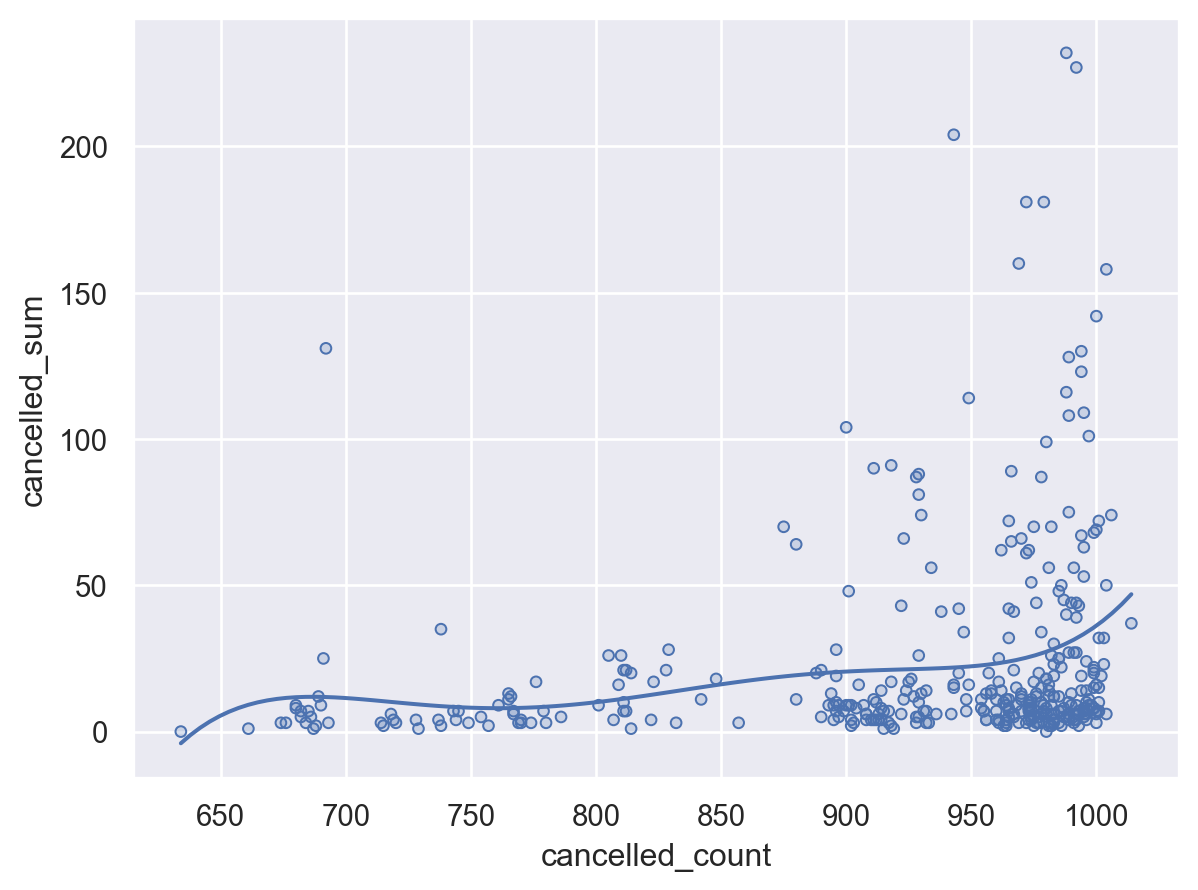

In [25]:
(
    so.Plot(cancelled_per_day.query('cancelled_sum < 300'), x='cancelled_count', y='cancelled_sum')
    .add(so.Dots())
    .add(so.Line(), so.PolyFit(5))
)

In [26]:
def get_delayed_positive(group):
  return pd.Series([
      group['cancelled'].mean(),
      group.query('dep_delay > 0')['dep_delay'].mean(),
      group.query('arr_delay > 0')['arr_delay'].mean(),
  ], index = ['cancelled_prop', 'avg_dep_delay', 'avg_arr_delay'])
  
cancelled_and_delays = (
  flights.assign(
    cancelled = lambda x: x.dep_delay.isna() | x.arr_delay.isna())
  .groupby(['month', 'day'])
  .apply(get_delayed_positive)
)

display(cancelled_and_delays)

cancelled_prop  avg_dep_delay  avg_arr_delay
month day                                              
1     1              0.01          32.66          32.48
      2              0.02          32.63          32.03
      3              0.02          28.50          27.66
...                   ...            ...            ...
12    29             0.02          42.81          47.26
      30             0.02          29.91          31.24
      31             0.02          26.27          24.46

[365 rows x 3 columns]

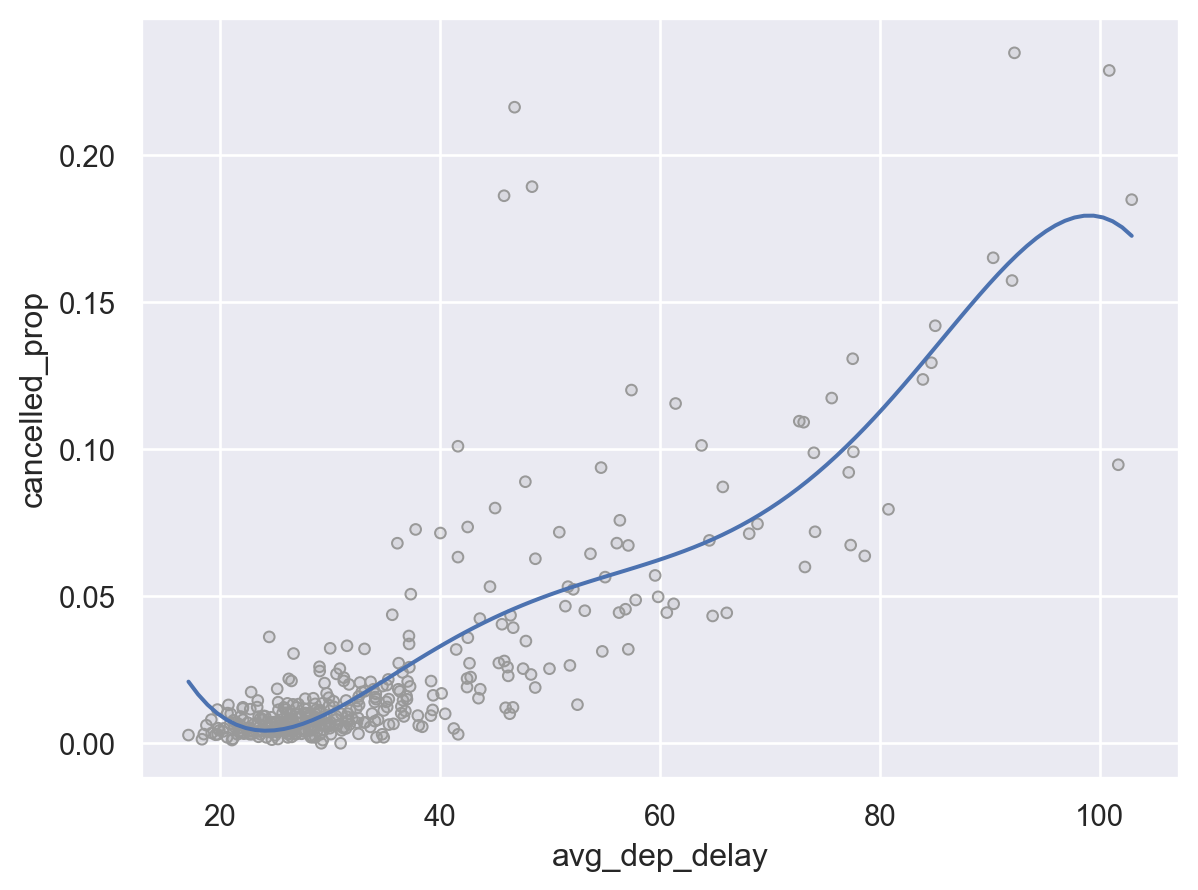

In [27]:
(
    so.Plot(cancelled_and_delays.query('cancelled_prop < .3'), x='avg_dep_delay', y='cancelled_prop')
    .add(so.Dots(color='.6'))
    .add(so.Line(), so.PolyFit(5))
)

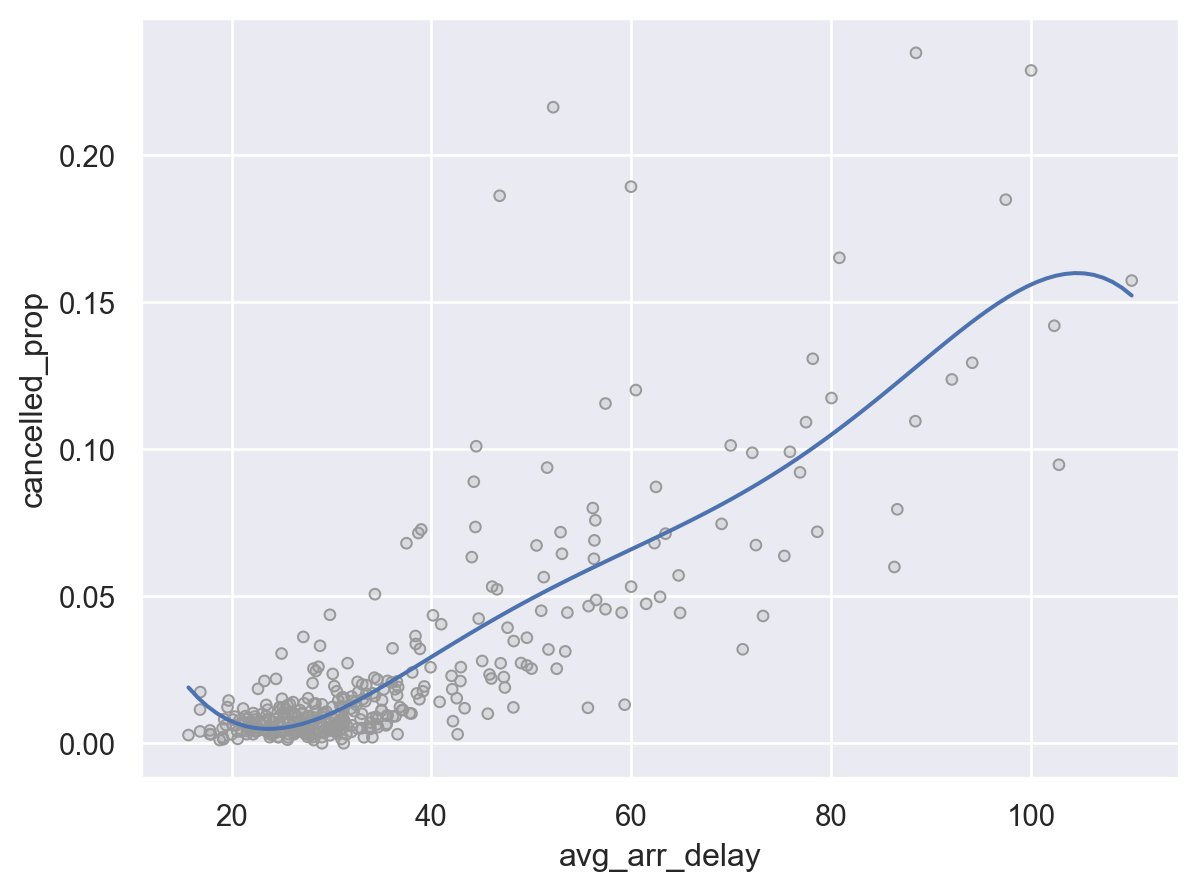

In [28]:
(
    so.Plot(cancelled_and_delays.query('cancelled_prop < .3'), x='avg_arr_delay', y='cancelled_prop')
    .add(so.Dots(color='.6'))
    .add(so.Line(), so.PolyFit(5))
)

- What time of day should you fly if you want to avoid delays as much as possible?


In [29]:
# The time with the least delay in arrival
(
    flights
    .groupby('sched_dep_time')['arr_delay']
    .mean()
    .reset_index()
    .sort_values('arr_delay', ascending=True)
)

,sched_dep_time,arr_delay
102,712,-35.35
56,626,-30.00
3,505,-26.50
...,...,...
798,1848,69.00
991,2207,105.33
0,106,NaN


In [30]:
# except minus delay
(
    flights
    .groupby(['sched_dep_time'])[['arr_delay']]
    .apply(lambda x: x.query('arr_delay > 0').mean())
    .sort_values('arr_delay', ascending=True)
)

,arr_delay
sched_dep_time,
2133,1.00
712,2.00
534,3.00
...,...
2201,NaN
2208,NaN
2345,NaN


In [31]:
def get_delayed_positive(group):
    return pd.Series(
        [
            group.query("arr_delay > 0")["arr_delay"].median(),
            group.query("arr_delay > 0")["arr_delay"].count(),
            group["arr_delay"].count(),
        ],
        index=["avg_arr_delay", "arr_delay_cnt", "total_arr_delay_cnt"],
    )

time_delay = (
    flights.groupby(["sched_dep_time"])
    .apply(get_delayed_positive)
    .fillna(0)
    .reset_index()
)

time_delay

,sched_dep_time,avg_arr_delay,arr_delay_cnt,total_arr_delay_cnt
0,106,0.00,0.00,0.00
1,500,7.00,73.00,340.00
2,501,0.00,0.00,1.00
...,...,...,...,...
1018,2355,12.00,36.00,73.00
1019,2358,18.00,29.00,44.00
1020,2359,18.00,413.00,810.00


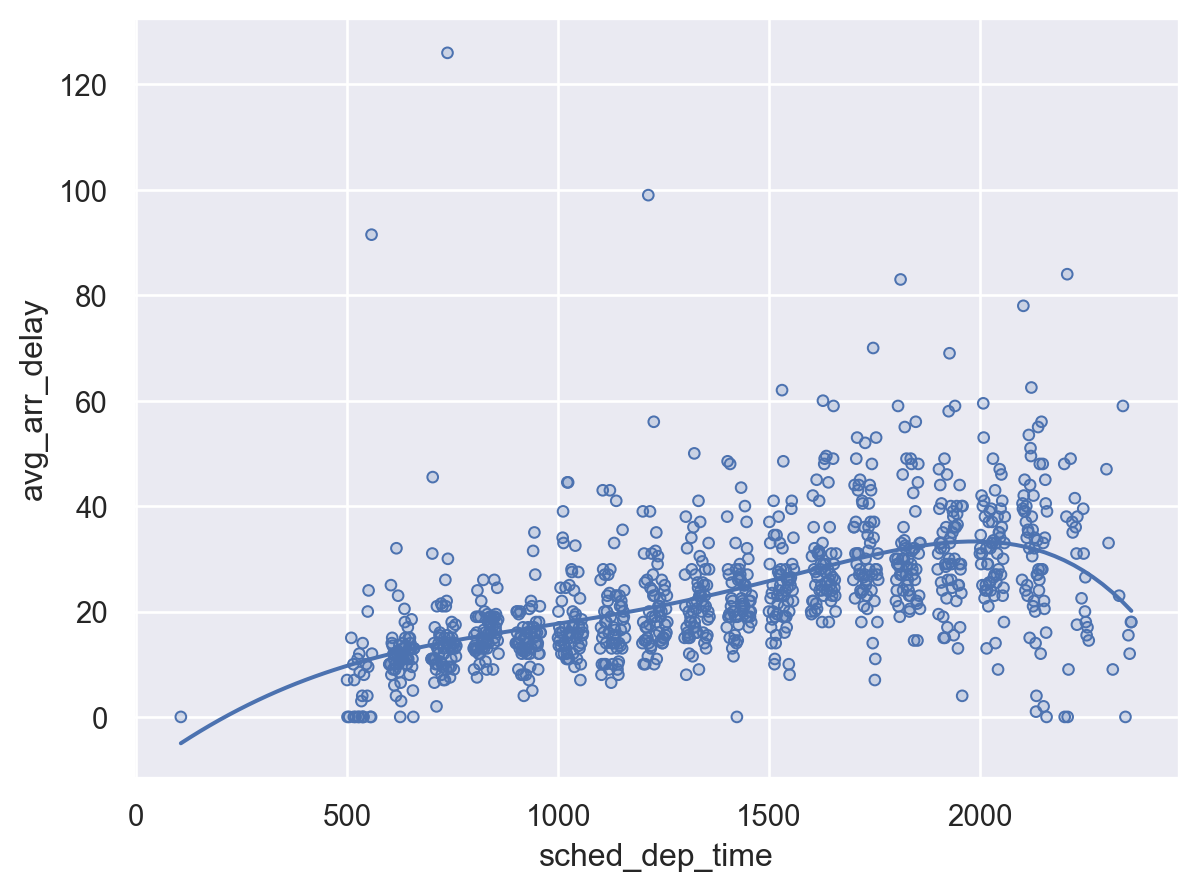

In [32]:
(
    so.Plot(time_delay, x='sched_dep_time', y='avg_arr_delay')
    .add(so.Dots())
    .add(so.Line(), so.PolyFit(5))
)

In [33]:
# Do outliers have fewer samples?
time_delay.sort_values(by="avg_arr_delay", ascending=False)

,sched_dep_time,avg_arr_delay,arr_delay_cnt,total_arr_delay_cnt
128,738,126.00,2.00,15.00
404,1214,99.00,6.00,52.00
28,558,91.50,2.00,3.00
...,...,...,...,...
989,2201,0.00,0.00,1.00
18,538,0.00,0.00,4.00
0,106,0.00,0.00,0.00


- For each destination, compute the total minutes of delay. For each flight, compute the proportion of the total delay for its destination

In [34]:
# For each destination, compute the total minutes of delay.
total_delay = flights.groupby("dest")["arr_delay"].sum().reset_index(name="total_delay")

display(total_delay)

,dest,total_delay
0,ABQ,1113.00
1,ACK,1281.00
2,ALB,6018.00
...,...,...
102,TVC,1232.00
103,TYS,13912.00
104,XNA,7406.00


In [35]:
# For each flight, compute the proportion of the total delay for its destination.
# by merge,

(
    flights.merge(total_delay, on="dest")
    .assign(prop_delay = lambda x: x.arr_delay / x.total_delay)
    .sort_values(["year", "month", "day", "hour", "minute"])
    .head(3)
)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,total_delay,prop_delay
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,30046.00,0.00
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,30046.00,0.00
7198,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,3467.00,0.01


In [36]:
# by transform,
flights["total_delay"] = flights.groupby("dest")["arr_delay"].transform("sum")
flights.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,total_delay
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,30046.00
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,30046.00
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,3467.00


In [37]:
flights.assign(prop_delay = lambda x: x.arr_delay / x.total_delay).head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,total_delay,prop_delay
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,30046.00,0.00
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,30046.00,0.00
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,3467.00,0.01


- Find all destinations that are flown by at least two carriers. Use that information to rank the carriers
    - 즉, 적어도 두 항공사가 출항하는 도착지들도 한정한 후,
    - 다양한 곳으로 출항할수록 높은 순위의 항공사라고 보고, 항공사들의 순위를 정해봄

In [38]:
# Find all destinations that are flown by at least two carriers. Use that information to rank the carriers.

flights.groupby("dest")["carrier"].nunique()

dest
ABQ    1
ACK    1
ALB    1
      ..
TVC    2
TYS    2
XNA    2
Name: carrier, Length: 105, dtype: int64

In [39]:
dest_carrier = flights.copy()
dest_carrier["carrier_n"] = flights.groupby("dest")["carrier"].transform("nunique")

dest_carrier.query('carrier_n >= 2').head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,total_delay,carrier_n
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,30046.00,2
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,30046.00,2
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,3467.00,3


In [40]:
(
    dest_carrier.query('carrier_n >= 2')
    .groupby("carrier")["dest"]
    .nunique()
    .reset_index(name="n_dest")
    .assign(rank = lambda x: x.n_dest.rank(ascending=False, method="min"))
    .sort_values("rank")
)

,carrier,n_dest,rank
5,EV,51,1.00
0,9E,48,2.00
11,UA,42,3.00
...,...,...,...
2,AS,1,14.00
6,F9,1,14.00
8,HA,1,14.00


- Which carrier has the worst arrival dealy? Challenge: can you disentangle the effects of bad airporrts vs. bad carriers? Why / why not?
    - 항공사 (carrier)마다 취향하는 곳에 차이가 날 수 있다면, 그건 그 노선 혹은 공항의 문제이지 항공사의 문제는 아닐 수도 있음을 암시하는 것

In [41]:
# Total delay by carrier within each origin, dest
arr_delay = (
    flights.groupby(['carrier', 'origin', 'dest'])['arr_delay']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'arr_delay', 'count': 'flights'})
    .reset_index()
)

display(arr_delay)

,carrier,origin,dest,arr_delay,flights
0,9E,EWR,ATL,-6.25,4
1,9E,EWR,CVG,1.40,796
2,9E,EWR,DTW,2.54,220
...,...,...,...,...,...
436,YV,LGA,CLT,12.86,258
437,YV,LGA,IAD,18.92,278
438,YV,LGA,PHL,-14.38,8


In [42]:
# Total delay within each origin dest
arr_delay_total = (
    arr_delay.groupby(["origin", "dest"])[["arr_delay", "flights"]]
    .sum()
    .reset_index()
    .rename(columns={"arr_delay": "arr_delay_total", "flights": "flights_total"})
)

display(arr_delay_total)

,origin,dest,arr_delay_total,flights_total
0,EWR,ALB,14.40,418
1,EWR,ANC,-2.50,8
2,EWR,ATL,33.79,4876
...,...,...,...,...
221,LGA,TVC,31.75,73
222,LGA,TYS,3.89,265
223,LGA,XNA,125.96,709


In [43]:
# using `transform` instead of `merge`
arr_delay[["arr_delay_total", "flights_total"]] = \
    arr_delay.groupby(["origin", "dest"])[["arr_delay", "flights"]].transform("sum")
    
display(arr_delay)

,carrier,origin,dest,arr_delay,flights,arr_delay_total,flights_total
0,9E,EWR,ATL,-6.25,4,33.79,4876
1,9E,EWR,CVG,1.40,796,22.60,2513
2,9E,EWR,DTW,2.54,220,88.35,3009
...,...,...,...,...,...,...,...
436,YV,LGA,CLT,12.86,258,45.37,5961
437,YV,LGA,IAD,18.92,278,30.48,1659
438,YV,LGA,PHL,-14.38,8,-8.32,598


In [44]:
# relative delay: average delay of each carrier - average delay of other carriers
arr_delay_relative = arr_delay.assign(
    arr_delay_others_mean=lambda x: (x.arr_delay_total - x.arr_delay)
    / (x.flights_total - x.flights),
    arr_delay_mean=lambda x: x.arr_delay / x.flights,
    arr_delay_diff=lambda x: x.arr_delay_mean - x.arr_delay_others_mean,
)

display(arr_delay_relative)

,carrier,origin,dest,arr_delay,flights,arr_delay_total,flights_total,arr_delay_others_mean,arr_delay_mean,arr_delay_diff
0,9E,EWR,ATL,-6.25,4,33.79,4876,0.01,-1.56,-1.57
1,9E,EWR,CVG,1.40,796,22.60,2513,0.01,0.00,-0.01
2,9E,EWR,DTW,2.54,220,88.35,3009,0.03,0.01,-0.02
...,...,...,...,...,...,...,...,...,...,...
436,YV,LGA,CLT,12.86,258,45.37,5961,0.01,0.05,0.04
437,YV,LGA,IAD,18.92,278,30.48,1659,0.01,0.07,0.06
438,YV,LGA,PHL,-14.38,8,-8.32,598,0.01,-1.80,-1.81


In [45]:
(
    arr_delay_relative
    .groupby("carrier")["arr_delay_diff"]
    .mean()
    .sort_values(ascending=False)
)

carrier
OO   28.79
EV    5.35
VX    1.83
      ... 
DL   -1.72
MQ   -5.25
HA     NaN
Name: arr_delay_diff, Length: 16, dtype: float64

- which plane (tailnum) has the worst on-time record?
    - on-time을 적절히 정의한 후에 진행, 여러 방식이 있을 수 있음
    - 예를 들어, 늦게 도착하지 않은 항공편의 "갯수"로 보거나
    - 도착지연의 평균값을 기준으로 볼 수도 있음

In [46]:
# 2. Which plane (tailnum) has the worst on-time record?
# on-time: 늦게 도착하지 않은 항공편의 횟수

on_time = (
    flights[flights["tailnum"].notna()]
    .assign(
        on_time = lambda x: x.arr_delay <= 0 & x.arr_time.notna()
    )
    .groupby("tailnum")["on_time"]
    .agg(["mean", "count"])
    .sort_values("mean")
)

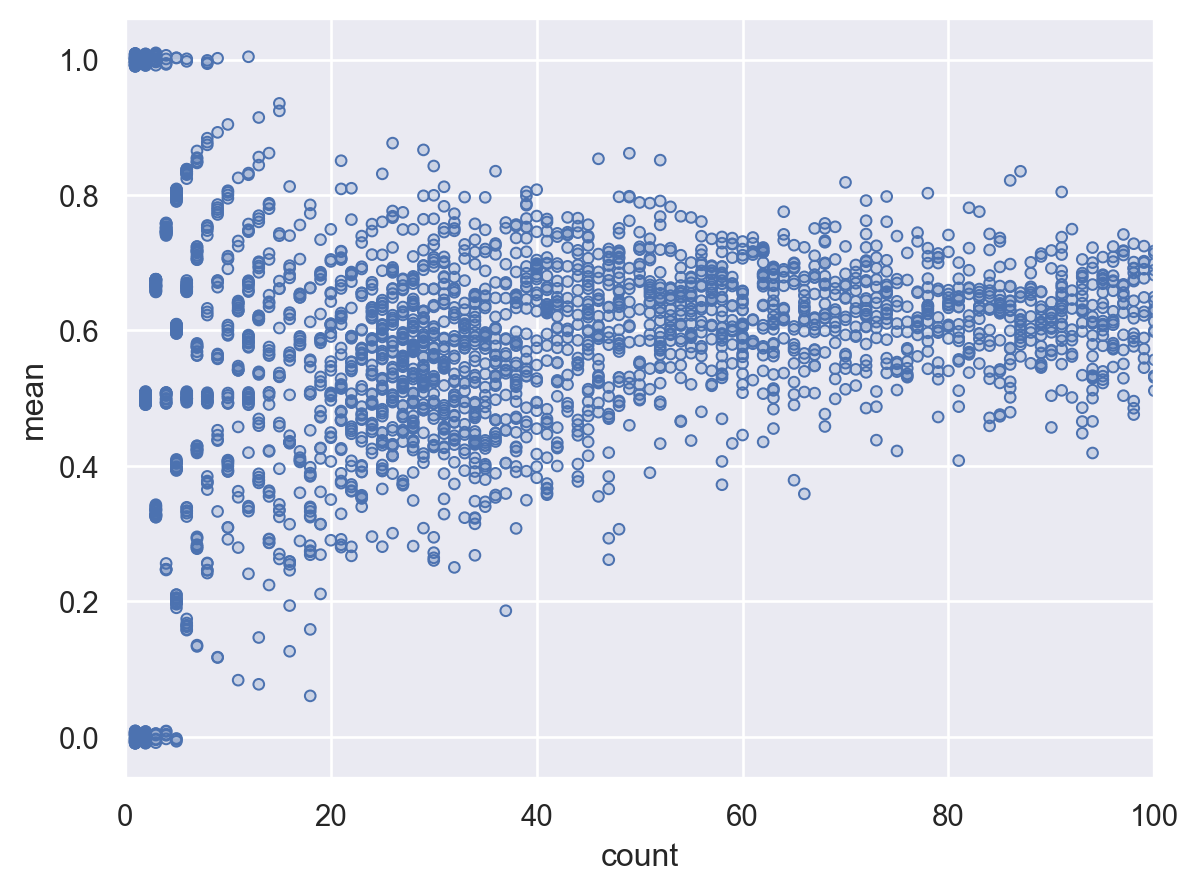

In [47]:
(
    so.Plot(on_time, x='count', y='mean')
    .add(so.Dots(), so.Jitter(y=0.02))
    .limit(x=(0, 100))
)

In [48]:
on_time.query('count > 20').nlargest(3, "mean")

,mean,count
tailnum,,
N382HA,0.88,26
N423AS,0.86,29
N5EJAA,0.86,21


In [49]:
## on-time: 도착 delay의 길이로 파악하는 경우

(
    flights.groupby("tailnum")["arr_delay"]
    .agg(["mean", "count"])
    .query("count > 20")
    .nlargest(3, "mean")
)

,mean,count
tailnum,,
N203FR,59.12,41
N645MQ,51.00,24
N956AT,47.65,34


- Look at each destination. Can you find flights that are supiciously fast? (i.e. flights that represent a potential date entry error).
    - 빠르게 비행한 이유: 제트 기류? 정체가 심한 공항? ..
    - 같은 루트를 비행한느 항공편들 안에서 특이점이라면 의심해 볼만함...
    - 서로 다른 루트를 비행하는 항공편들과의 비교는?
    - 빠르다는 것을 비교하려면 동일한 루트에서 비교해야 적절함
    다른 루트의 항공편들까지 같이 비교하려면 어떤 방식이 있겠는가?

In [50]:
flights = flights.assign(
    mph = lambda x: x.distance / x.air_time * 60
)

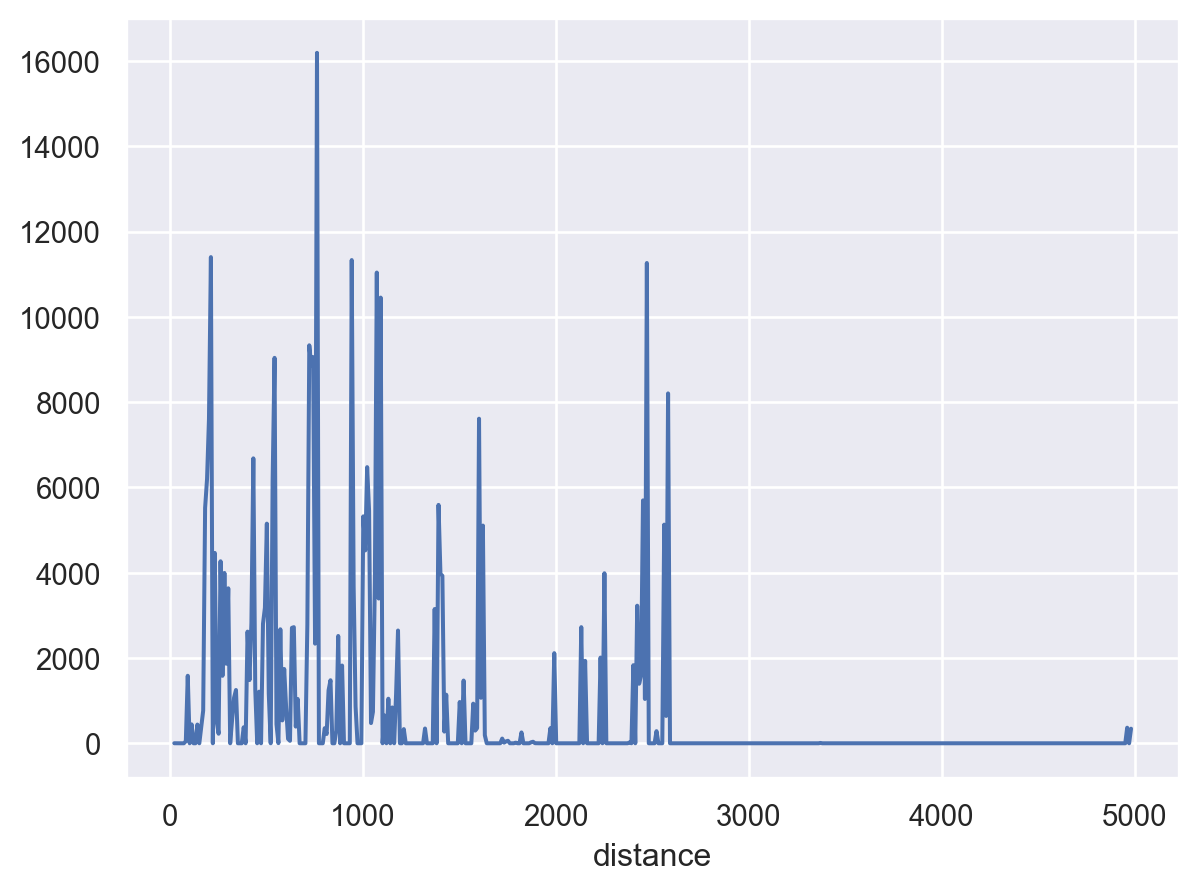

In [51]:
(
    so.Plot(flights, x='distance')
    .add(so.Line(), so.Hist(binwidth=10))
)

In [52]:
standardized = (
    flights
    .groupby(["origin", "dest"])["air_time"]
    .agg([("air_time_mean", "mean"), ("air_time_std", "std"), ("n", "count")])
    .reset_index()
)
display(standardized)

,origin,dest,air_time_mean,air_time_std,n
0,EWR,ALB,31.79,3.08,418
1,EWR,ANC,413.12,14.67,8
2,EWR,ATL,111.99,9.99,4876
...,...,...,...,...,...
221,LGA,TVC,94.60,6.49,73
222,LGA,TYS,97.82,8.52,265
223,LGA,XNA,173.17,15.91,709


In [53]:
def normalize(x):
    return (x - x.mean()) / x.std()

standardized_flights = flights.copy()

standardized_flights["air_time_z"] = (
    flights
    .groupby(["origin", "dest"])["air_time"]
    .transform(normalize)
)

In [54]:
standardized_flights.nlargest(5, "air_time_z")

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,total_delay,mph,air_time_z
237716,2013,6,17,1652.00,1700,-8.00,1856.00,1815,41.00,US,...,N967UW,LGA,BOS,107.00,184,17,0,43780.00,103.18,14.78
244468,2013,6,24,1932.00,1920,12.00,2228.00,2047,101.00,UA,...,N37255,EWR,BOS,112.00,200,19,20,43780.00,107.14,14.56
309910,2013,9,1,2237.00,1711,326.00,41.00,1851,350.00,B6,...,N346JB,JFK,SYR,97.00,209,17,11,15199.00,129.28,13.87
230885,2013,6,10,1356.00,1300,56.00,1646.00,1414,152.00,US,...,N745VJ,LGA,DCA,131.00,214,13,0,82609.00,98.02,13.52
248839,2013,6,29,755.00,800,-5.00,1035.00,909,86.00,B6,...,N328JB,JFK,ACK,141.00,199,8,0,1281.00,84.68,12.17


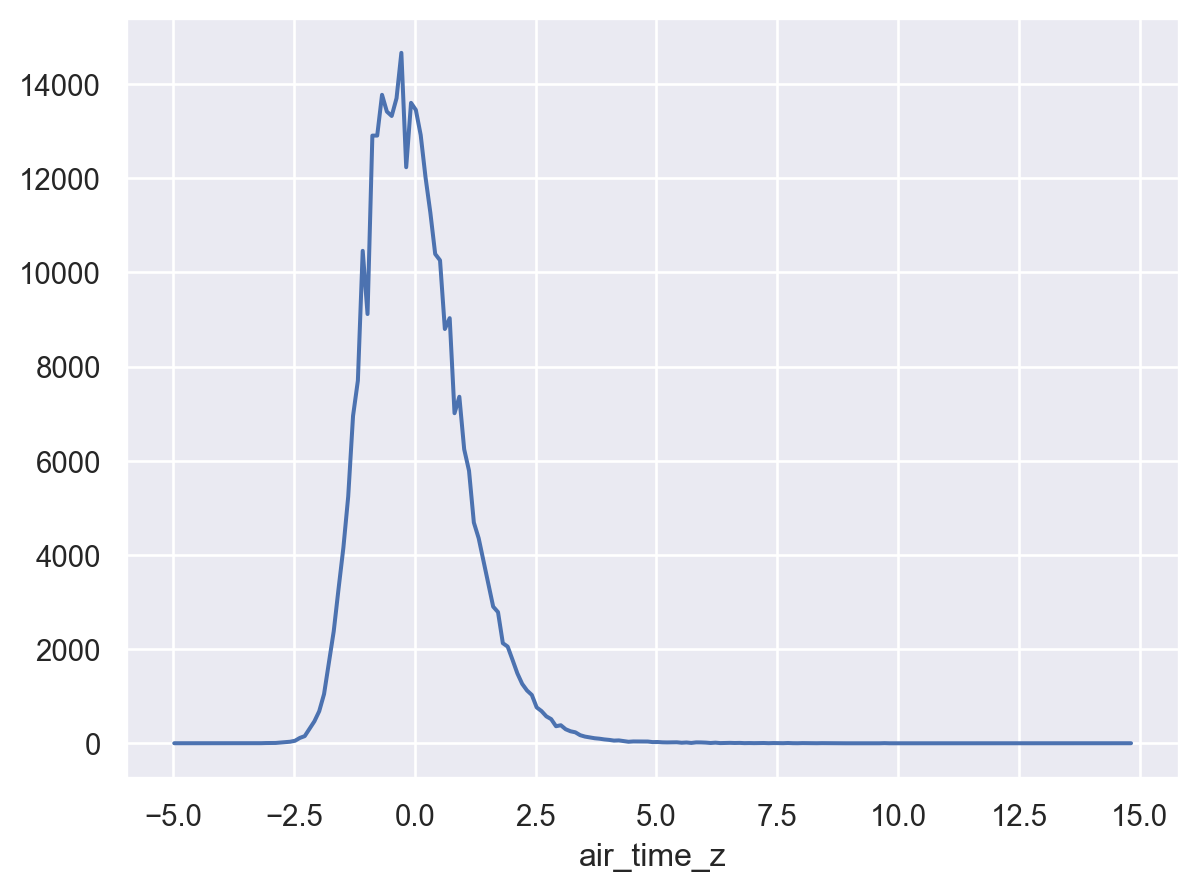

In [55]:
(
    so.Plot(standardized_flights, x='air_time_z')
    .add(so.Line(), so.Hist(binwidth=.1))
)

- Compute the air tiem of a flight relative to the shortest flight to that destination. Which flights were most delayed in the air?
    - "상대적"의 의미가 값의 차이로 볼지 비율의 차이로 볼지도 고려

In [56]:
# difference by proportion
air_time_delayed = flights.copy()
air_time_delayed["air_time_delayed"] = (
    flights
    .groupby(["origin", "dest"])["air_time"]
    .transform(lambda x: (x - x.min()) / x.min()))

air_time_delayed.sort_values("air_time_delayed", ascending=False).head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,total_delay,mph,air_time_delayed
237716,2013,6,17,1652.00,1700,-8.00,1856.00,1815,41.00,US,...,N967UW,LGA,BOS,107.00,184,17,0,43780.00,103.18,4.10
230885,2013,6,10,1356.00,1300,56.00,1646.00,1414,152.00,US,...,N745VJ,LGA,DCA,131.00,214,13,0,82609.00,98.02,3.09
248839,2013,6,29,755.00,800,-5.00,1035.00,909,86.00,B6,...,N328JB,JFK,ACK,141.00,199,8,0,1281.00,84.68,3.03


In [57]:
# difference by value
air_time_delayed = flights.copy()
air_time_delayed["air_time_delayed"] = (
    flights
    .groupby(["origin", "dest"])["air_time"]
    .transform(lambda x: x - x.min()))

air_time_delayed.sort_values("air_time_delayed", ascending=False).head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,total_delay,mph,air_time_delayed
276578,2013,7,28,1727.00,1730,-3.00,2242.00,2110,92.00,DL,...,N703TW,JFK,SFO,490.00,2586,17,30,35210.00,316.65,189.00
76185,2013,11,22,1812.00,1815,-3.00,2302.00,2146,76.00,DL,...,N178DN,JFK,LAX,440.00,2475,18,15,8768.00,337.50,165.00
24032,2013,1,28,1806.00,1700,66.00,2253.00,1950,183.00,AA,...,N5DBAA,JFK,EGE,382.00,1747,17,0,1305.00,274.40,163.00


- For each plane, count the number of flights before the first delay of greater than 1 hour.

In [58]:
flights_first_delay = (
    flights[flights.arr_delay.notna()][["tailnum", "year", "month", "day", "arr_delay"]]
    .assign(delay_1h=lambda x: (x.arr_delay > 60))
    .sort_values(["tailnum", "year", "month", "day"])
)

display(flights_first_delay)

,tailnum,year,month,day,arr_delay,delay_1h
120316,D942DN,2013,2,11,91.00,True
157233,D942DN,2013,3,23,44.00,False
157799,D942DN,2013,3,24,2.00,False
...,...,...,...,...,...,...
107510,N9EAMQ,2013,12,27,-18.00,False
109161,N9EAMQ,2013,12,29,48.00,False
109420,N9EAMQ,2013,12,29,53.00,False


In [59]:
(
    flights_first_delay.groupby("tailnum").apply(lambda x: x.delay_1h.cumsum())
    .reset_index(level=0)
    .groupby("tailnum")
    .apply(lambda x: np.sum(x.delay_1h < 1))
    .sort_values(ascending=False)
)

tailnum
N717TW    119
N765US     97
N705TW     97
         ... 
N376AA      0
N378AA      0
D942DN      0
Length: 4037, dtype: int64

In [60]:

# flights = sm.datasets.get_rdataset("flights", "nycflights13").data.drop(columns="time_hour")
# airlines = sm.datasets.get_rdataset("airlines", "nycflights13").data
# airports = sm.datasets.get_rdataset("airports", "nycflights13").data
# planes = sm.datasets.get_rdataset("planes", "nycflights13").data
# weather = sm.datasets.get_rdataset("weather", "nycflights13").data
flights = pd.read_csv('data/flights.csv')
airports = pd.read_csv('data/airports.csv')
planes = pd.read_csv('data/planes.csv')
weather = pd.read_csv('data/weather.csv')
airlines = pd.read_csv('data/airlines.csv')
display(weather)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.00,10.36,NaN,0.00,1012.00,10.00,2013-01-01 01:00:00
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.00,8.06,NaN,0.00,1012.30,10.00,2013-01-01 02:00:00
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.00,11.51,NaN,0.00,1012.50,10.00,2013-01-01 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26112,LGA,2013,12,30,16,32.00,15.08,49.19,340.00,14.96,23.02,0.00,1019.50,10.00,2013-12-30 16:00:00
26113,LGA,2013,12,30,17,30.92,12.92,46.74,320.00,17.26,NaN,0.00,1019.90,10.00,2013-12-30 17:00:00
26114,LGA,2013,12,30,18,28.94,10.94,46.41,330.00,18.41,NaN,0.00,1020.90,10.00,2013-12-30 18:00:00


- Add the location of the origin and destination (i.e. lat and lon in airports) to flights

In [61]:
airport_location = airports[['faa', 'lat', 'lon']]
display(airport_location)

,faa,lat,lon
0,04G,41.13,-80.62
1,06A,32.46,-85.68
2,06C,41.99,-88.10
...,...,...,...
1455,ZWI,39.74,-75.55
1456,ZWU,38.90,-77.01
1457,ZYP,40.75,-73.99


In [62]:
flights = flights.merge(airport_location, left_on='origin', right_on='faa').drop('faa', axis=1)
display(flights)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,lat,lon
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,40.69,-74.17
1,2013,1,1,554.00,558,-4.00,740.00,728,12.00,UA,1696,N39463,EWR,ORD,150.00,719,5,58,40.69,-74.17
2,2013,1,1,555.00,600,-5.00,913.00,854,19.00,B6,507,N516JB,EWR,FLL,158.00,1065,6,0,40.69,-74.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,2307.00,2255,12.00,2359.00,2358,1.00,B6,718,N565JB,JFK,BOS,33.00,187,22,55,40.64,-73.78
336774,2013,9,30,2349.00,2359,-10.00,325.00,350,-25.00,B6,745,N516JB,JFK,PSE,196.00,1617,23,59,40.64,-73.78
336775,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,40.64,-73.78


In [63]:
flights[~flights.dest.isin(airport_location.faa)]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,lat,lon
21,2013,1,1,701.00,700,1.00,1123.00,1154,-31.00,UA,1203,N77296,EWR,SJU,188.00,1608,7,0,40.69,-74.17
57,2013,1,1,913.00,918,-5.00,1346.00,1416,-30.00,UA,1519,N24715,EWR,STT,189.00,1634,9,18,40.69,-74.17
60,2013,1,1,926.00,929,-3.00,1404.00,1421,-17.00,B6,215,N775JB,EWR,SJU,191.00,1608,9,29,40.69,-74.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336754,2013,9,30,2050.00,2045,5.00,20.00,53,-33.00,DL,347,N396DA,JFK,SJU,188.00,1598,20,45,40.64,-73.78
336765,2013,9,30,2145.00,2145,0.00,115.00,140,-25.00,B6,1103,N633JB,JFK,SJU,192.00,1598,21,45,40.64,-73.78
336774,2013,9,30,2349.00,2359,-10.00,325.00,350,-25.00,B6,745,N516JB,JFK,PSE,196.00,1617,23,59,40.64,-73.78


In [64]:
flights = flights.merge(
    airport_location,
    left_on="dest",
    right_on="faa",
    how="left",
    suffixes=("_origin", "_dest"),
).drop("faa", axis=1)

display(flights)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,lat_origin,lon_origin,lat_dest,lon_dest
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,...,EWR,IAH,227.00,1400,5,15,40.69,-74.17,29.98,-95.34
1,2013,1,1,554.00,558,-4.00,740.00,728,12.00,UA,...,EWR,ORD,150.00,719,5,58,40.69,-74.17,41.98,-87.90
2,2013,1,1,555.00,600,-5.00,913.00,854,19.00,B6,...,EWR,FLL,158.00,1065,6,0,40.69,-74.17,26.07,-80.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,2307.00,2255,12.00,2359.00,2358,1.00,B6,...,JFK,BOS,33.00,187,22,55,40.64,-73.78,42.36,-71.01
336774,2013,9,30,2349.00,2359,-10.00,325.00,350,-25.00,B6,...,JFK,PSE,196.00,1617,23,59,40.64,-73.78,NaN,NaN
336775,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,JFK,DCA,NaN,213,14,55,40.64,-73.78,38.85,-77.04


- Is there a relationship between the age of a plane and its delays?

In [65]:
plane_age = (
    planes[["tailnum", "year"]]
    .merge(flights, on="tailnum", how="right", suffixes=("_plane", ""))
    .drop("tailnum", axis=1)
    .assign(age=lambda x: x.year - x.year_plane)
)

display(plane_age)

,year_plane,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,dest,air_time,distance,hour,minute,lat_origin,lon_origin,lat_dest,lon_dest,age
0,1999.00,2013,1,1,517.00,515,2.00,830.00,819,11.00,...,IAH,227.00,1400,5,15,40.69,-74.17,29.98,-95.34,14.00
1,2012.00,2013,1,1,554.00,558,-4.00,740.00,728,12.00,...,ORD,150.00,719,5,58,40.69,-74.17,41.98,-87.90,1.00
2,2000.00,2013,1,1,555.00,600,-5.00,913.00,854,19.00,...,FLL,158.00,1065,6,0,40.69,-74.17,26.07,-80.15,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336773,2003.00,2013,9,30,2307.00,2255,12.00,2359.00,2358,1.00,...,BOS,33.00,187,22,55,40.64,-73.78,42.36,-71.01,10.00
336774,2000.00,2013,9,30,2349.00,2359,-10.00,325.00,350,-25.00,...,PSE,196.00,1617,23,59,40.64,-73.78,NaN,NaN,13.00
336775,NaN,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,...,DCA,NaN,213,14,55,40.64,-73.78,38.85,-77.04,NaN


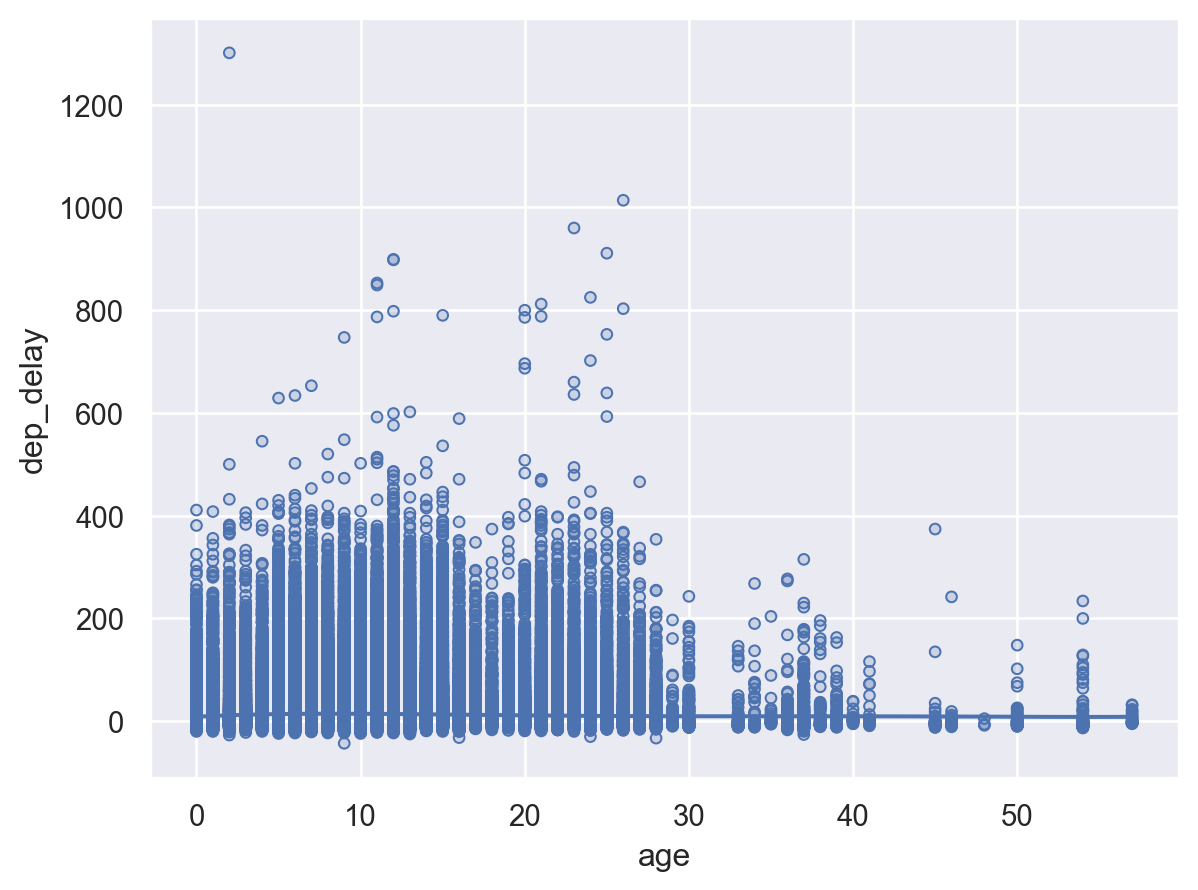

In [66]:
(
    so.Plot(plane_age, x='age', y='dep_delay')
    .add(so.Dots())
    .add(so.Line(), so.PolyFit(5))
)

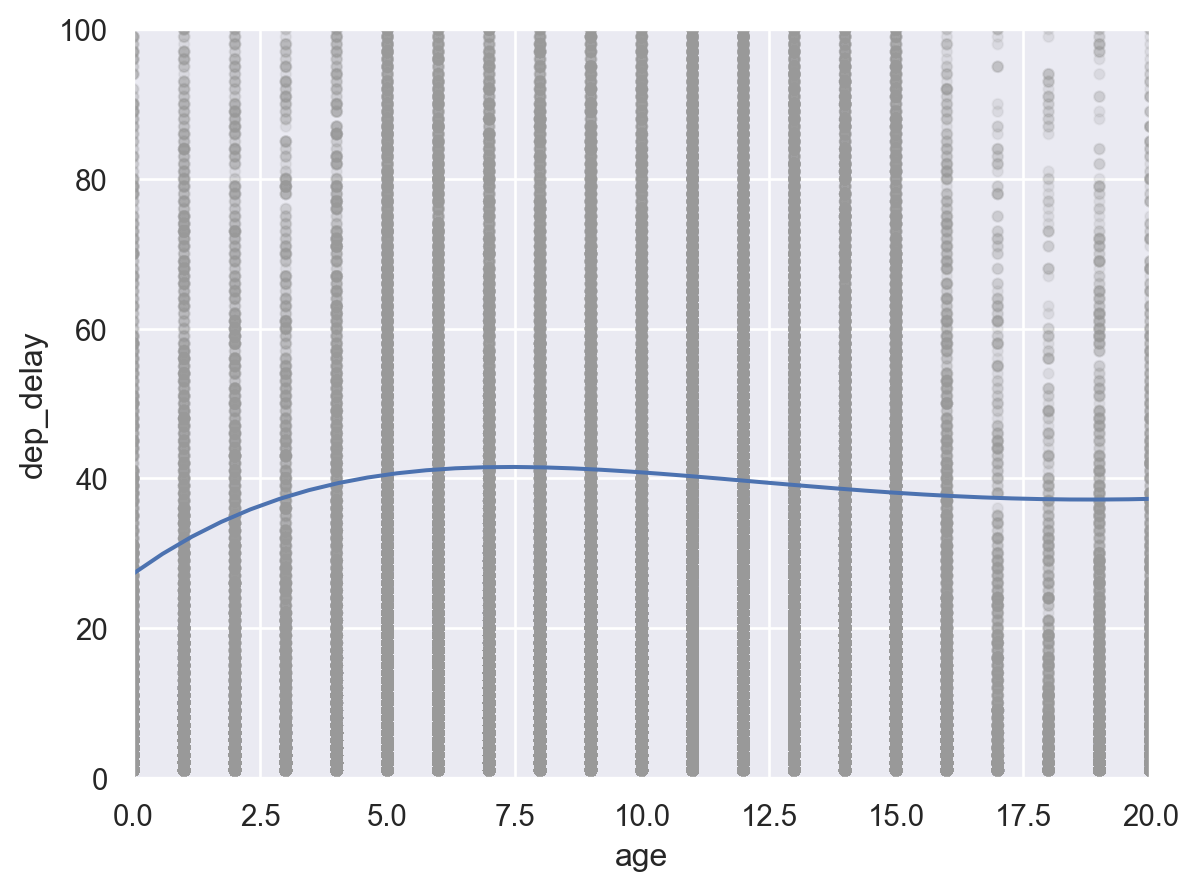

In [67]:
(
    so.Plot(plane_age.query('dep_delay > 0'), x='age', y='dep_delay')
    .add(so.Dots(alpha=.1, color=".6"))
    .add(so.Line(), so.PolyFit(5))
    .limit(y=(0, 100), x=(0, 20))
)

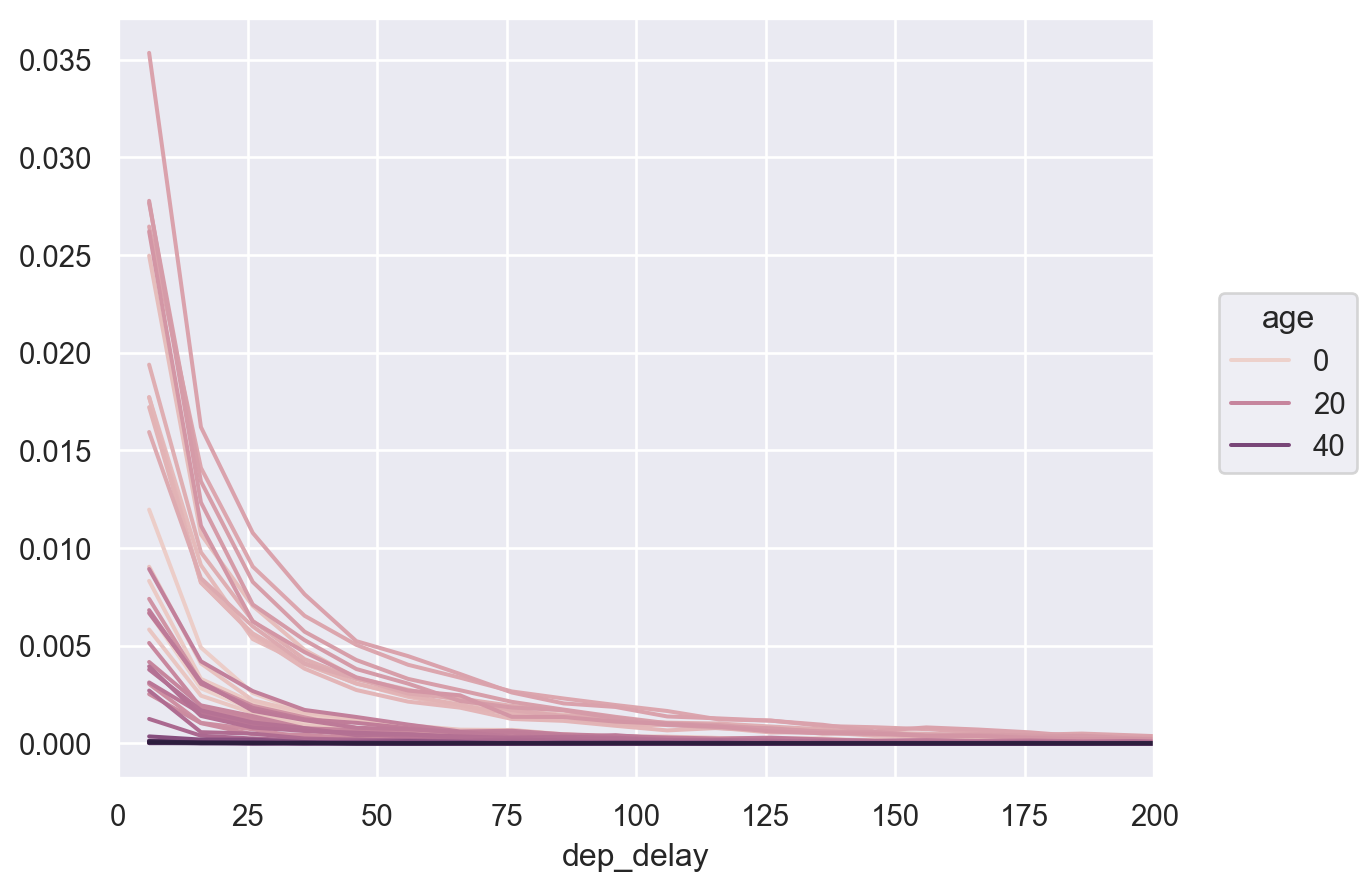

In [68]:
(
    so.Plot(plane_age.query('dep_delay > 0'), x='dep_delay', color="age")
    .add(so.Line(), so.Hist(stat="proportion", binwidth=10))
    .limit(x=(0, 200))
)

In [69]:
age_delay = (
    plane_age.query('dep_delay > 0 & dep_delay < 100')
    .groupby("age")["dep_delay"]
    .agg(["mean", "median", "count"])
    .reset_index()
)
display(age_delay)

,age,mean,median,count
0,0.00,22.73,13.00,1686
1,1.00,19.97,11.00,2761
2,2.00,22.54,13.00,2092
...,...,...,...,...
43,50.00,19.88,14.50,16
44,54.00,26.62,15.00,26
45,57.00,14.91,13.00,11


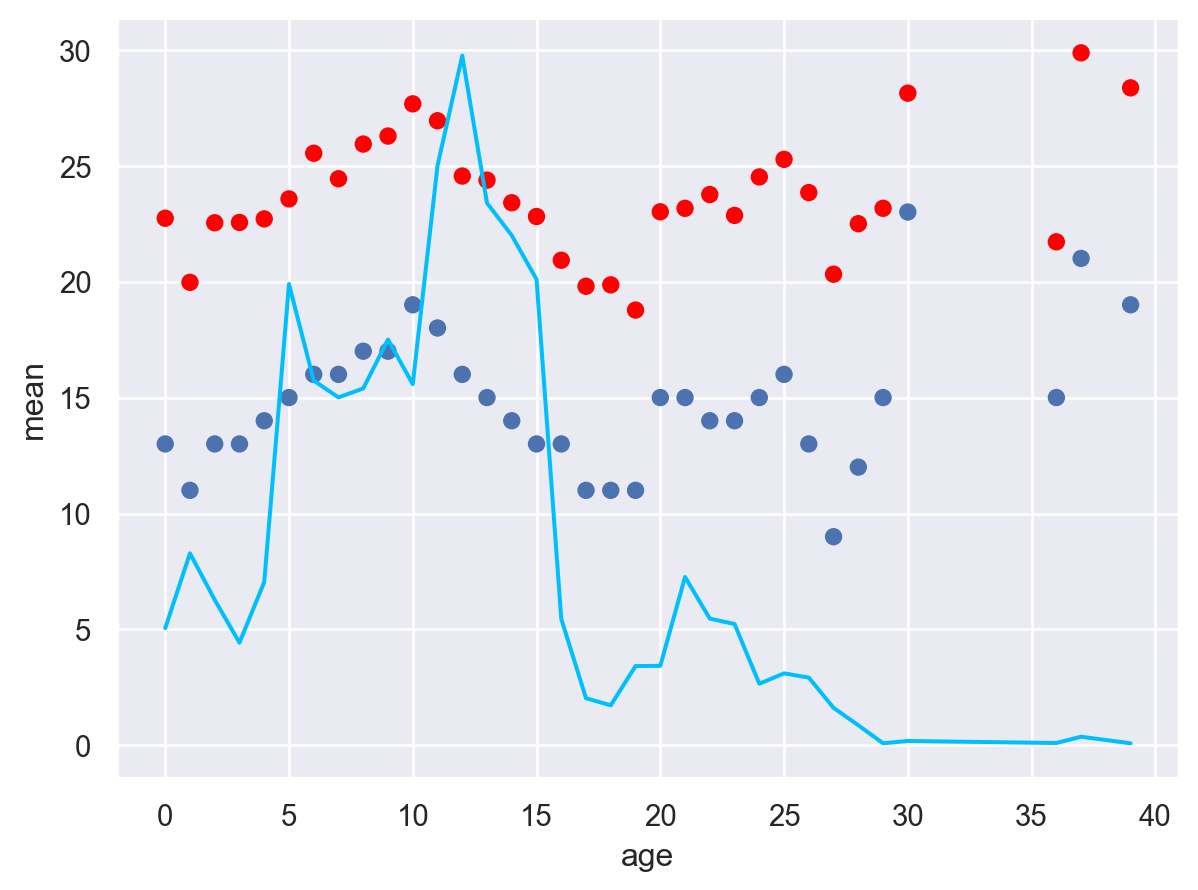

In [70]:
(
    so.Plot(age_delay.query('count > 30'), x='age')
    .add(so.Dot(color="red"), y="mean")
    .add(so.Dot(), y="median")
    .add(so.Line(color="deepskyblue"), y=age_delay["count"]/1000*3)
)

- What weather conditions make it more likely to see a delay?

In [71]:
flights_weather = flights.merge(weather)

display(flights_weather)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,...,39.02,28.04,64.43,260.00,12.66,NaN,0.00,1011.90,10.00,2013-01-01 05:00:00
1,2013,1,1,554.00,558,-4.00,740.00,728,12.00,UA,...,39.02,28.04,64.43,260.00,12.66,NaN,0.00,1011.90,10.00,2013-01-01 05:00:00
2,2013,1,1,555.00,600,-5.00,913.00,854,19.00,B6,...,37.94,28.04,67.21,240.00,11.51,NaN,0.00,1012.40,10.00,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335217,2013,9,30,2241.00,2246,-5.00,2345.00,1,-16.00,B6,...,60.98,55.94,83.47,230.00,9.21,NaN,0.00,1016.50,10.00,2013-09-30 22:00:00
335218,2013,9,30,2307.00,2255,12.00,2359.00,2358,1.00,B6,...,60.98,55.94,83.47,230.00,9.21,NaN,0.00,1016.50,10.00,2013-09-30 22:00:00
335219,2013,9,30,2349.00,2359,-10.00,325.00,350,-25.00,B6,...,60.08,55.04,83.41,240.00,9.21,NaN,0.00,1016.30,10.00,2013-09-30 23:00:00


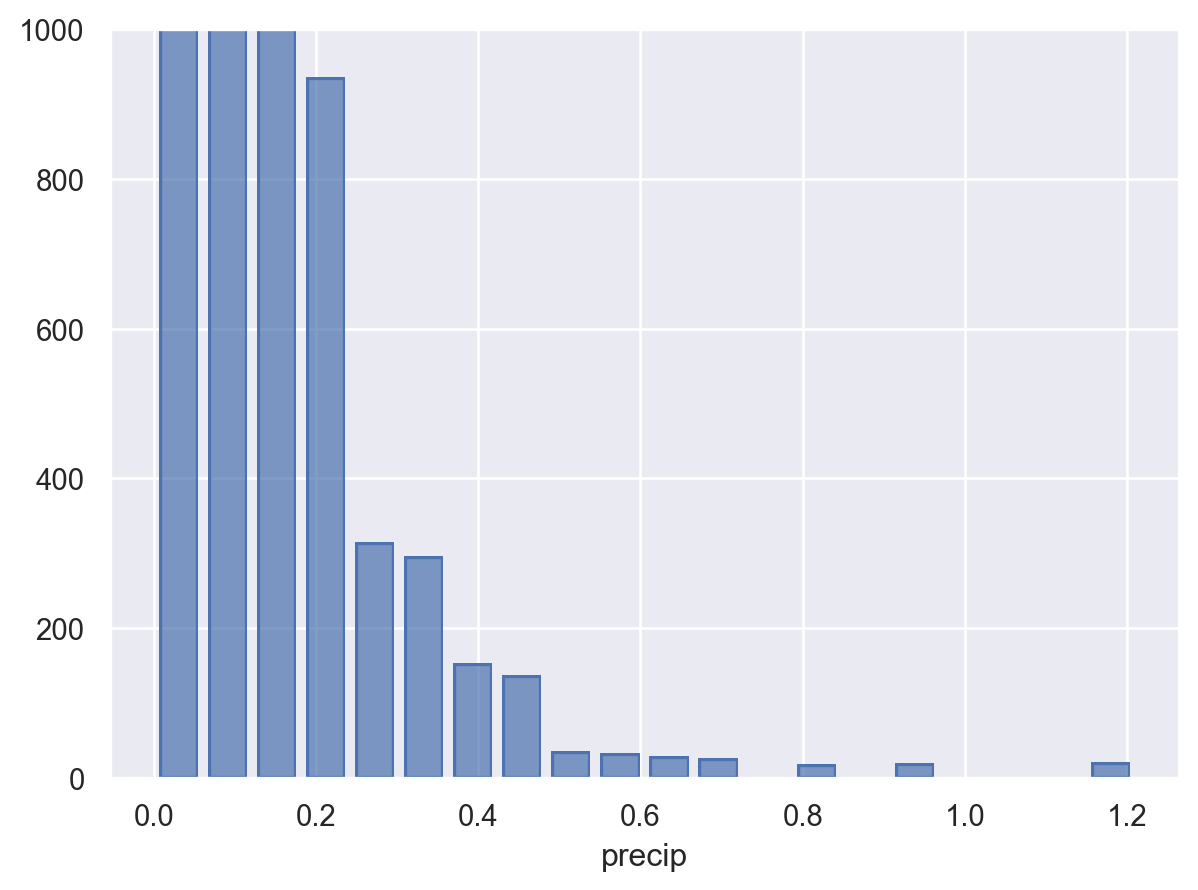

In [72]:
# 강수량 precipitation

(
    so.Plot(flights_weather, x='precip')
    .add(so.Bar(), so.Hist())
    .limit(y=(0, 1000))
)

In [73]:
# 강수량 precipitation
precip = flights_weather.groupby("precip")["dep_delay"].agg(["mean", "median"]).reset_index()
precip

,precip,mean,median
0,0.00,11.37,-2.00
1,0.01,29.80,3.00
2,0.02,24.08,2.00
...,...,...,...
52,0.82,94.67,36.00
53,0.94,27.85,19.00
54,1.21,113.11,65.50


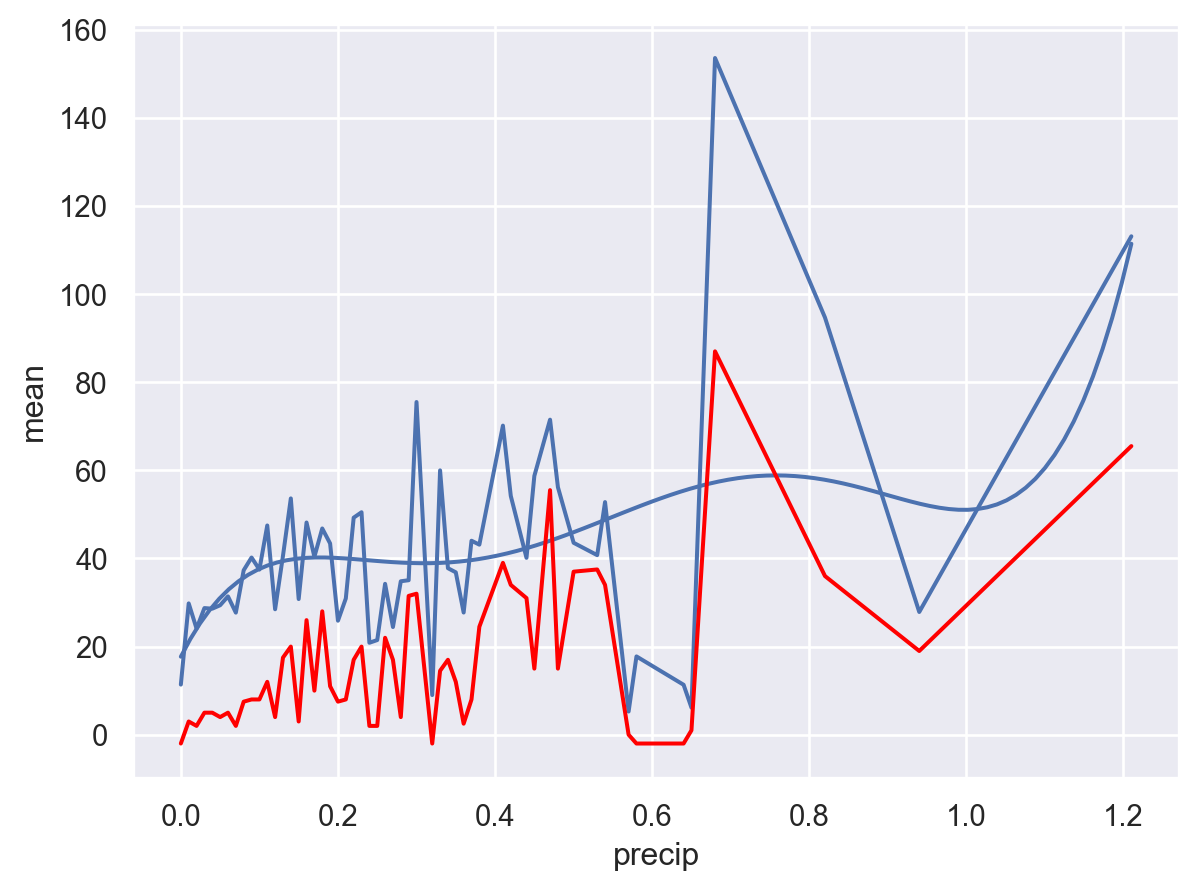

In [74]:
(
    so.Plot(precip, x='precip', y="mean")
    .add(so.Line())
    .add(so.Line(), so.PolyFit(5))
    .add(so.Line(color="red"), y="median")
)

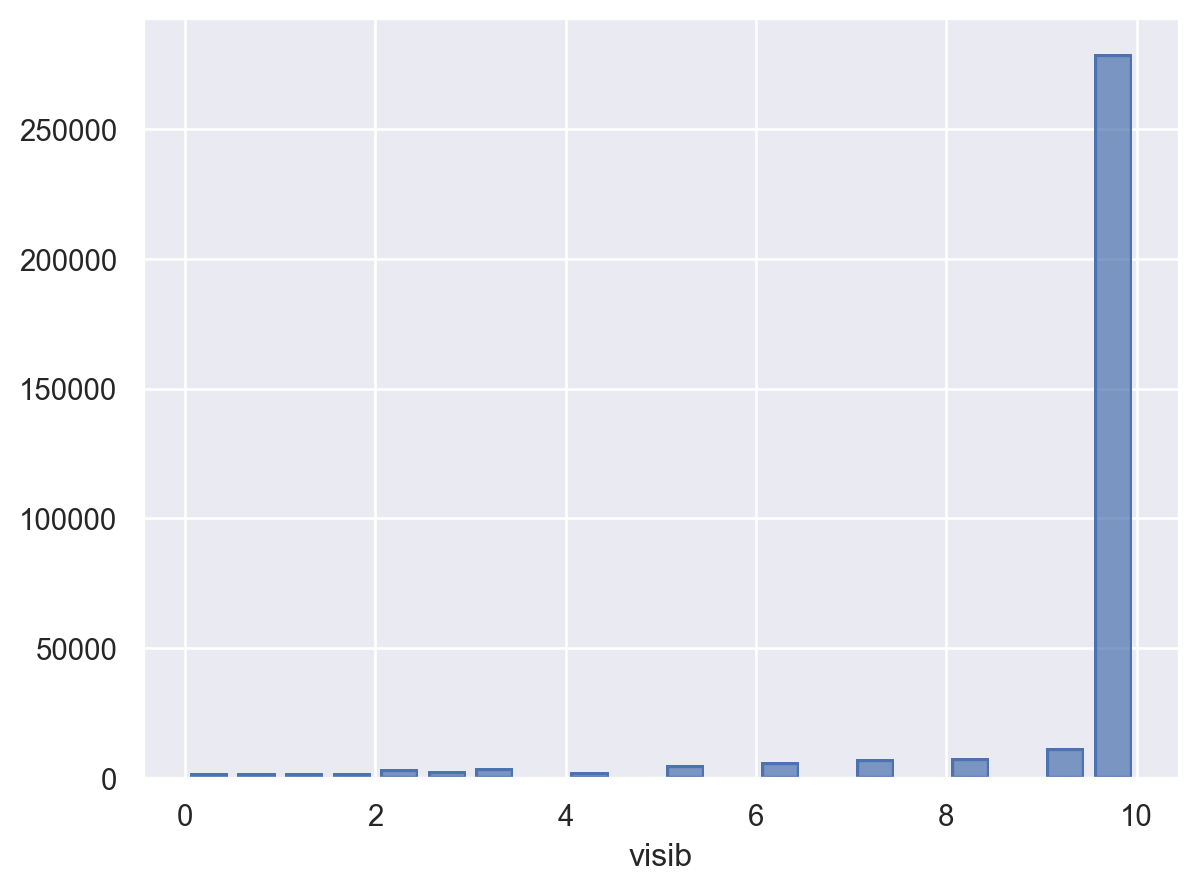

In [75]:
# 시야 visibility
(
    so.Plot(flights_weather, x='visib')
    .add(so.Bar(), so.Hist())
)

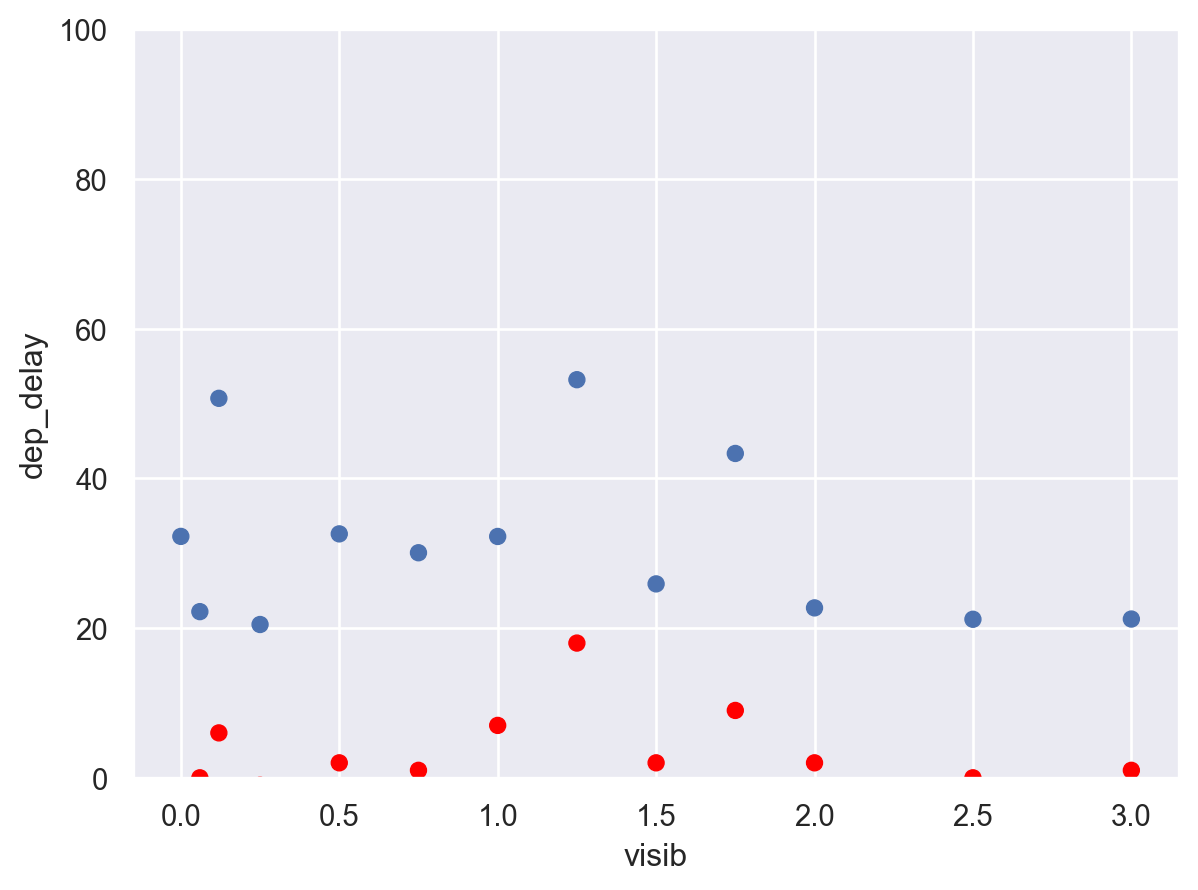

In [76]:
(
    so.Plot(flights_weather.query('visib < 4'), x='visib', y='dep_delay')
    .add(so.Dot(), so.Agg())
    .add(so.Dot(color="red"), so.Agg("median"))
    .limit(y=(0, 100))
)

- flights 테이블에서 하루 평균 도착지연 (arr_delay)가 가장 큰 10일에 해당하는 항공편을 선택

In [77]:
delay_top = (
    flights
    .groupby(["year", "month", "day"])["arr_delay"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

display(delay_top)

year  month  day
2013  3      8     85.86
      6      13    63.75
      7      22    62.76
                    ... 
      12     17    55.87
      8      8     55.48
      12     5     51.67
Name: arr_delay, Length: 10, dtype: float64

In [78]:
flights.merge(delay_top.reset_index(name="daily_delay"), on=["year", "month", "day"])

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,lat_origin,lon_origin,lat_dest,lon_dest,daily_delay
0,2013,12,5,32.00,1930,302.00,228.00,2136,292.00,EV,...,CHS,94.00,628,19,30,40.69,-74.17,32.90,-80.04,51.67
1,2013,12,5,50.00,2046,244.00,233.00,2224,249.00,EV,...,GSO,80.00,445,20,46,40.69,-74.17,36.10,-79.94,51.67
2,2013,12,5,457.00,500,-3.00,637.00,651,-14.00,US,...,CLT,81.00,529,5,0,40.69,-74.17,35.21,-80.94,51.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9834,2013,9,12,NaN,1510,NaN,NaN,1630,NaN,MQ,...,DCA,NaN,213,15,10,40.64,-73.78,38.85,-77.04,58.91
9835,2013,9,12,NaN,2015,NaN,NaN,2155,NaN,MQ,...,CMH,NaN,483,20,15,40.64,-73.78,40.00,-82.89,58.91
9836,2013,9,12,NaN,1829,NaN,NaN,1939,NaN,MQ,...,BWI,NaN,184,18,29,40.64,-73.78,39.18,-76.67,58.91


- flights 테이블의 도착지 (dest)에 대한 공항정보가 airports 테이블에 없는 그러한 도착지 (dest)를 구하면

In [79]:
# flights 테이블에서 공항 코드가 airports 테이블에 없는 도착지 찾기
flights[~flights.dest.isin(airports.faa)]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,lat_origin,lon_origin,lat_dest,lon_dest
21,2013,1,1,701.00,700,1.00,1123.00,1154,-31.00,UA,...,EWR,SJU,188.00,1608,7,0,40.69,-74.17,NaN,NaN
57,2013,1,1,913.00,918,-5.00,1346.00,1416,-30.00,UA,...,EWR,STT,189.00,1634,9,18,40.69,-74.17,NaN,NaN
60,2013,1,1,926.00,929,-3.00,1404.00,1421,-17.00,B6,...,EWR,SJU,191.00,1608,9,29,40.69,-74.17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336754,2013,9,30,2050.00,2045,5.00,20.00,53,-33.00,DL,...,JFK,SJU,188.00,1598,20,45,40.64,-73.78,NaN,NaN
336765,2013,9,30,2145.00,2145,0.00,115.00,140,-25.00,B6,...,JFK,SJU,192.00,1598,21,45,40.64,-73.78,NaN,NaN
336774,2013,9,30,2349.00,2359,-10.00,325.00,350,-25.00,B6,...,JFK,PSE,196.00,1617,23,59,40.64,-73.78,NaN,NaN


- Filter flights (항공편) flights to only show flights with planes that have flown at least 100 flights

In [80]:
n_planes = (
    flights.groupby("tailnum")["flight"].count()
    .reset_index(name="n")
    .query('n >= 100')
)
display(n_planes)

,tailnum,n
1,N0EGMQ,371
2,N10156,153
6,N10575,289
...,...,...
4003,N979DL,126
4036,N996DL,102
4042,N9EAMQ,248


In [81]:
flights.merge(n_planes)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,lat_origin,lon_origin,lat_dest,lon_dest,n
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,...,IAH,227.00,1400,5,15,40.69,-74.17,29.98,-95.34,111
1,2013,1,8,1435.00,1440,-5.00,1717.00,1746,-29.00,UA,...,MIA,150.00,1085,14,40,40.69,-74.17,25.79,-80.29,111
2,2013,1,9,717.00,700,17.00,812.00,815,-3.00,UA,...,BOS,39.00,200,7,0,40.69,-74.17,42.36,-71.01,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228387,2013,9,26,1758.00,1759,-1.00,2101.00,2102,-1.00,UA,...,LAX,316.00,2475,17,59,40.64,-73.78,33.94,-118.41,273
228388,2013,9,29,1112.00,1115,-3.00,1342.00,1415,-33.00,UA,...,LAX,309.00,2475,11,15,40.64,-73.78,33.94,-118.41,273
228389,2013,9,30,654.00,700,-6.00,956.00,1020,-24.00,UA,...,SFO,333.00,2586,7,0,40.64,-73.78,37.62,-122.37,273


- Find the 48 hours (over the course of the whole year) that have the worst (departure) delays
    - flights의 hour 열을 이용할 것

In [82]:
(
    flights.groupby(["year", "month", "day", "hour"])["dep_delay"]
    .mean()
    .nlargest(48)
)

year  month  day  hour
2013  2      9    10     269.00
      4      10   22     176.40
                  20     170.16
                          ...  
             19   21     117.12
      6      24   17     116.11
      3      8    11     115.62
Name: dep_delay, Length: 48, dtype: float64

- You might expect that there’s an implicit relationship between plane and airline, because each plane is flown by a single airline. Confirm or reject this hypothesis using the tools you’ve learned above.
    - 즉, 각 비행기는 특정 항공사에서만 운행되는가의 질문. 2개 이상의 항공사에서 운항되는 비행기가 있는지 확인해 볼 것
    - 2개 이상의 항공사에서 운항되는 비행기들만 포함하고, 그 항공사들의 full name을 함께 포함하는 테이블을 만들어 볼 것

In [83]:
planes_carriers = (
    flights
    .value_counts(["tailnum", "carrier"])
    .reset_index()
)

planes_carriers = planes_carriers[['tailnum', 'carrier']]

display(planes_carriers)

,tailnum,carrier
0,N725MQ,MQ
1,N722MQ,MQ
2,N723MQ,MQ
...,...,...
4057,N670US,DL
4058,N955DN,DL
4059,N8618N,WN


In [84]:
planes_share = (
    planes_carriers
    .groupby("tailnum")["carrier"]
    .count()
    .reset_index(name="n")
    .query("n > 1")
)
display(planes_share)

,tailnum,n
195,N146PQ,2
224,N153PQ,2
342,N176PQ,2
...,...,...
4021,N989AT,2
4023,N990AT,2
4031,N994AT,2


In [85]:
flights.merge(planes_share).merge(airlines)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,air_time,distance,hour,minute,lat_origin,lon_origin,lat_dest,lon_dest,n,name
0,2013,1,11,1244.00,1250,-6.00,1459.00,1449,10.00,9E,...,92.00,488,12,50,40.69,-74.17,42.21,-83.35,2,Endeavor Air Inc.
1,2013,1,11,1821.00,1830,-9.00,2014.00,2044,-30.00,9E,...,79.00,488,18,30,40.69,-74.17,42.21,-83.35,2,Endeavor Air Inc.
2,2013,1,15,612.00,615,-3.00,927.00,855,32.00,9E,...,134.00,760,6,15,40.64,-73.78,33.64,-84.43,2,Endeavor Air Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,2013,7,9,2224.00,1859,205.00,16.00,2121,175.00,FL,...,95.00,762,18,59,40.78,-73.87,33.64,-84.43,2,AirTran Airways Corporation
822,2013,7,14,1310.00,1310,0.00,1532.00,1532,0.00,FL,...,108.00,762,13,10,40.78,-73.87,33.64,-84.43,2,AirTran Airways Corporation
823,2013,8,27,1324.00,1310,14.00,1525.00,1536,-11.00,FL,...,98.00,762,13,10,40.78,-73.87,33.64,-84.43,2,AirTran Airways Corporation
